<a href="https://colab.research.google.com/github/L120Git/NLP_Google_Restaurants/blob/main/1_NLP_carga_y_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.Librerías necesarias

In [1]:
#!pip install rarfile
#!pip install unzip
!pip install pandas
!pip install numpy
!pip install stop-words
!pip install num2words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=18beba738af1aedb140a12916506b1da6ced5c23ee6dee0220ce9cc5d0f60cfc
  Stored in directory: /root/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b38ca98ed0d0efa80f70054a6051539b4b9f99b7565ea23deb8d8

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Librerias necesarias
import numpy as np
import pandas as pd
from google.colab import drive
import random
#import rarfile # para descomprimir archivos
import json
#import csv 
#para limpiar los datos
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
nltk.download('omw-1.4')
import string
import unicodedata
from num2words import num2words
#para reducir la dimensión
from sklearn.manifold import TSNE
#para representar
import matplotlib.pyplot as plt

#análisis exloratorio
from collections import Counter
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.probability import FreqDist

#preprocesado
from stop_words import get_stop_words
import unicodedata
import re

#modelado
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#reporte
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##1. Carga de datos

In [4]:
# Montamos GDrive para almacenar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
#with rarfile.RarFile('/content/drive/MyDrive/NLP/filter_all_t.json', 'r') as rf:
#  rf.extractall('./content')

In [7]:
#Localizamos el archivo y lo leemos
path = '/content/drive/MyDrive/NLP/'

with open(f'{path}filter_all_t.json', 'r') as f:
  data = json.load(f)

data = data['train']#[10000]  #subset de las primeras 10000 líneas
data

[{'business_id': '60567465d335d0abfb415b26',
  'user_id': '101074926318992653684',
  'rating': 4,
  'review_text': 'The tang of the tomato sauce is outstanding. And the crust is a meal, as it should be. Order a whole pie fresh.',
  'pics': ['AF1QipM-2IRmvitARbcJr7deWfe5hyVBg_ArPMQSYvq0',
   'AF1QipPWhe1OP80YPU40J6-XIdxbJIe57vKm8TTjve31',
   'AF1QipNuKWM65S9ZFQykvdIhKUliE6K1VBxssTUYyl8d',
   'AF1QipOJng1JS_1hmpfhAVrr7hE89dcoOtdy-Z6cOO9x'],
  'history_reviews': [['101074926318992653684_6056272797d555cc6fb0d147',
    'The pizza here is the real deal, perfect in every way except for the crust, which was more cracker crisp than chewy bread. Also recommend the meatball parmigiana hero, beefy, fluffy, overflowing, tangy, chunky tomato sauce, toothsome bread.'],
   ['101074926318992653684_604a65c2c6dc737bce7e5a3d',
    'Omg the tomato sauce is everything, in the meatball appetizer, pizza & as a dip for that scratch-made focaccia. Farm-fresh salad. A variety of artisan toppings. Ask for the chi

In [8]:
#Creamos el df 
reviews_text = []
reviews_sentiment = []

for review in data:
    reviews_text.append(review.get('review_text'))
    reviews_sentiment.append(review.get('rating'))

df= pd.DataFrame({
    'review_text': reviews_text,
    'reviews_sentiment': reviews_sentiment
})
df.dropna(subset=['review_text', 'reviews_sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,review_text,reviews_sentiment
0,The tang of the tomato sauce is outstanding. A...,4
1,Chicken and waffles were really good!,5
2,The appetizer of colossal shrimp was very good...,4
3,The fish tacos here omg! The salad was great ...,5
4,"Ribs are great, as are the mac and cheese, fri...",4
...,...,...
87008,The tacos were just okay.,3
87009,I had the Pasta Mardi Gras,5
87010,We order the Pork Bar-B-Que pizza (our favorit...,4
87011,"Beer was very tasty, The Alt was one of my fav...",5


In [9]:
#observo la cantidad de ratings distintos que hay para ver si debo hacer un balance
print(Counter(df['reviews_sentiment'].tolist())) 

Counter({5: 54665, 4: 22333, 3: 6918, 2: 2027, 1: 1070})


In [10]:
#creo una función que me estrae de forma aleatoria un porcentaje de muestras positivas y negativas

rows_pos = 0.05 #elijo el porcentaje de datos positivos que voy a extraer 
rows_neg = 0.25 #datos negativos

def Balance(df):
  ''' 
  df: dataframe a balancear
  '''
  #defino las muestras negativas que me quiero quedar
  df_positive= df[df['reviews_sentiment']>= 4].sample(frac = rows_pos, replace=True) 
  
  #defino las muestras positivas que me quiero quedar
  df_negative = df[df['reviews_sentiment']<=3].sample(frac= rows_neg, replace=True)

  #concateno todo, y añado los negativos a mi df
  df_balanced = pd.concat([df_positive, df_negative]).sample(frac=1).reset_index(drop=True)

  #reseteo los índices
  #df_balanced.reset_index(drop=True, inplace=True)

  return df_balanced

df_balanced = Balance(df)
df_balanced


,review_text,reviews_sentiment
0,Great customer service and good burger. We ord...,5
1,(Original). Hier gibt es echt leckere Burger. ...,5
2,"When we got there, we were seated in under 5 m...",1
3,We enjoyed the charcoaled sampler for two for ...,4
4,if you have never ordered the pizza from the a...,4
...,...,...
6349,For appetizers we ordered Roti Telur and Calam...,2
6350,The ribs were near complete mush and slathered...,3
6351,Its craft beer and its good! They have the mos...,5
6352,I was told to try In N Out Burger when I visit...,3


In [11]:
#observo la cantidad de ratings distintos que hay para ver el balance
print(Counter(df_balanced['reviews_sentiment'].tolist())) 

Counter({5: 2744, 3: 1780, 4: 1106, 2: 461, 1: 263})


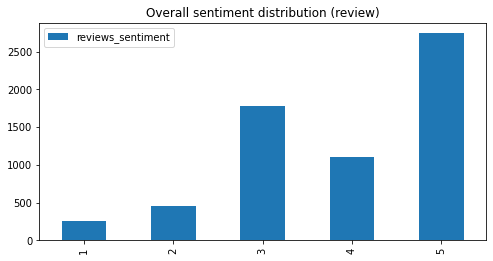

In [12]:
#mostramos la gráfica para ver como se distribuyen los ratings
aux_df = pd.DataFrame(df_balanced['reviews_sentiment'].value_counts(sort=False).sort_index()) #creo un df solo con los ratings
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4)) #lo ploteo

In [13]:
#split en train y test de del df_data
train, test = train_test_split(df_balanced, test_size = 0.25)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  4765
Ejemplos usados para test:  1589


##2. Análisis exploratorio

### 2.1. Primero el análisis del conjunto de entrenamiento

In [14]:
train

,review_text,reviews_sentiment
4798,The Big Sur Pizza truly deserves its awards.,5
5939,I never knew you could be emotional about pizza.,5
3317,Amazing clam chowder. Never had so much clam i...,3
3711,Came back for their pork brisket steak (good) ...,5
2047,They have coffee and coffee cinnamon cake avai...,4
...,...,...
2520,They serve really fresh bread and everything i...,5
147,"The overall experience was fantastic, the bris...",5
2338,The tropical sauce has a slight kick to it but...,3
3642,Love the tacos here. Get the chorizo.,5


In [15]:
#convertimos en minúsculas y tokenizamos por espacios 
reviews = train['review_text'].str.lower().str.split() 
train.head()

,review_text,reviews_sentiment
4798,The Big Sur Pizza truly deserves its awards.,5
5939,I never knew you could be emotional about pizza.,5
3317,Amazing clam chowder. Never had so much clam i...,3
3711,Came back for their pork brisket steak (good) ...,5
2047,They have coffee and coffee cinnamon cake avai...,4


#### 2.1.1. Cardinalidad del vocabulario

In [16]:
def word_count(text):
    # Tokenizar el texto
    tokens = nltk.word_tokenize(text)
    # Eliminar las palabras vacías
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return tokens

In [17]:
train['words'] = train['review_text'].apply(word_count)
train.head()

,review_text,reviews_sentiment,words
4798,The Big Sur Pizza truly deserves its awards.,5,"[The, Big, Sur, Pizza, truly, deserves, its, a..."
5939,I never knew you could be emotional about pizza.,5,"[I, never, knew, you, could, be, emotional, ab..."
3317,Amazing clam chowder. Never had so much clam i...,3,"[Amazing, clam, chowder, ., Never, had, so, mu..."
3711,Came back for their pork brisket steak (good) ...,5,"[Came, back, for, their, pork, brisket, steak,..."
2047,They have coffee and coffee cinnamon cake avai...,4,"[They, have, coffee, and, coffee, cinnamon, ca..."


In [18]:
#creamos una lista con la suma de las palabras de todas las reviews
words = list(train['words'].sum())
words

['The',
 'Big',
 'Sur',
 'Pizza',
 'truly',
 'deserves',
 'its',
 'awards',
 '.',
 'I',
 'never',
 'knew',
 'you',
 'could',
 'be',
 'emotional',
 'about',
 'pizza',
 '.',
 'Amazing',
 'clam',
 'chowder',
 '.',
 'Never',
 'had',
 'so',
 'much',
 'clam',
 'in',
 'clam',
 'chowder',
 'before',
 '!',
 'Lobster',
 'roll',
 'was',
 'definitely',
 'disappointing',
 'however',
 ',',
 'it',
 'was',
 '100',
 '%',
 'lobster',
 'claws',
 'only',
 '.',
 'Came',
 'back',
 'for',
 'their',
 'pork',
 'brisket',
 'steak',
 '(',
 'good',
 ')',
 'and',
 'their',
 'tiramisu',
 '(',
 'also',
 'good',
 '!',
 ')',
 'I',
 'got',
 'the',
 'mussels',
 'and',
 'farm',
 'salad',
 ';',
 'my',
 'wife',
 'got',
 'the',
 'rotisserie',
 'chicken',
 '.',
 'They',
 'have',
 'coffee',
 'and',
 'coffee',
 'cinnamon',
 'cake',
 'available',
 'outside',
 'while',
 'you',
 'wait',
 '.',
 'We',
 'got',
 'mimosas',
 ',',
 'cafe',
 'mocha',
 ',',
 'brioche',
 'French',
 'toast',
 'and',
 'the',
 'wild',
 'mushroom',
 'omelet',

In [19]:
#visualizamos las palabras sin duplicados
unique_word= list(set(train['words'].sum()))
unique_word

['airy',
 'option',
 'process',
 'standard',
 'sodas/milkshakes',
 'Ranch',
 'squirt',
 'skilled',
 'Impressive',
 'totally',
 'cheapest',
 'yess',
 'club',
 'placement',
 'village',
 'partially',
 '6.95lwith',
 'Belgian',
 'macaroni',
 'rinsed',
 'however',
 'McCormick',
 'Moonshine',
 'ga',
 'vodka',
 'Pancake',
 'still',
 'detect',
 'tail',
 'drinks',
 'shedded',
 'jerk',
 'monetary',
 'Buff',
 'well-trained',
 'holes',
 'anover-sizedonion',
 'caremel',
 'expectations',
 'stuff',
 'Slush',
 'space',
 'Niigata',
 'mash',
 'information',
 'popping',
 'Sean',
 'vermicelli',
 'drier',
 'jam',
 'prawn/shrimp',
 'hours',
 'creative',
 'pitcher',
 'mozz',
 'hairs',
 'Crudit',
 'remember',
 'separately',
 'Since',
 'detail',
 'stamped',
 'alcohols',
 'phenomenal-',
 'Family',
 'Soggy',
 'sauerkraut',
 'peppers',
 'ailoi',
 'either',
 'pronounced',
 'allergies',
 'fiambres',
 'awesome',
 'full',
 'onions/cilantro/tempura',
 'sparkling',
 'through',
 'Soi',
 'southern',
 'grits',
 'Linguine',

In [20]:
total_words = len(words)
total_words

139415

In [21]:
total_unique_words = len(unique_word)
total_unique_words

9507

#### 2.1.2. Análisis de sentimiento

In [22]:
#analizo el sentimiento en el punto medio 
train[train['reviews_sentiment']== 3]

,review_text,reviews_sentiment,words
3317,Amazing clam chowder. Never had so much clam i...,3,"[Amazing, clam, chowder, ., Never, had, so, mu..."
714,"For appetizer, we ordered the calamari and avo...",3,"[For, appetizer, ,, we, ordered, the, calamari..."
1543,My husband ordered the burrito ($22.95) with s...,3,"[My, husband, ordered, the, burrito, (, $, 22...."
5531,There was a 30 minute wait for a table so we w...,3,"[There, was, 30, minute, wait, for, table, so,..."
1620,"However, they do have mofongos and other latin...",3,"[However, ,, they, do, have, mofongos, and, ot..."
...,...,...,...
3770,For the review I tried the:. - smokehouse burg...,3,"[For, the, review, I, tried, the, :, ., -, smo..."
430,The chips and salsa given at the beginning are...,3,"[The, chips, and, salsa, given, at, the, begin..."
1758,"The burgers are small and flat, fries are sog...",3,"[The, burgers, are, small, and, flat, ,, fries..."
3569,"Cute small place with good service, however me...",3,"[Cute, small, place, with, good, service, ,, h..."


In [23]:
#definimos una etiqueta de sentimiento 0 para los negativos, 1 para los positivos
def label_sentiment(row):
    if int(row['reviews_sentiment']) <= 4: # 4 o más de tres ratings es positivo
        return 1
    else:
        return 0 #el resto negativos

In [24]:
#aplico las etiquetas y las meto en una columna
train['sentiment_label'] = train.apply(lambda row: label_sentiment(row), axis=1)

In [25]:
train.head()

,review_text,reviews_sentiment,words,sentiment_label
4798,The Big Sur Pizza truly deserves its awards.,5,"[The, Big, Sur, Pizza, truly, deserves, its, a...",0
5939,I never knew you could be emotional about pizza.,5,"[I, never, knew, you, could, be, emotional, ab...",0
3317,Amazing clam chowder. Never had so much clam i...,3,"[Amazing, clam, chowder, ., Never, had, so, mu...",1
3711,Came back for their pork brisket steak (good) ...,5,"[Came, back, for, their, pork, brisket, steak,...",0
2047,They have coffee and coffee cinnamon cake avai...,4,"[They, have, coffee, and, coffee, cinnamon, ca...",1


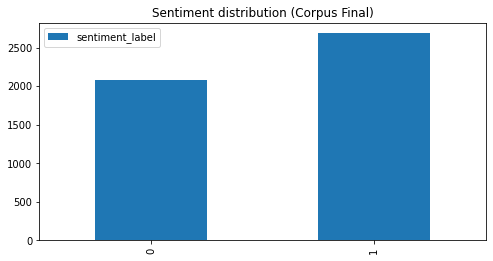

In [26]:
aux_df = pd.DataFrame(train['sentiment_label'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

In [27]:
#contamos las reviews positivas y las negativas
print('Total de etiquetas negativas: ', len(train[train['sentiment_label']== 0]))
print('Total de etiquetas positivas: ',len(train[train['sentiment_label']== 1]))


Total de etiquetas negativas:  2080
Total de etiquetas positivas:  2685


####2.1.3. N-grams más frecuentes

In [28]:
bigrams_ = ngrams(unique_word, 2)
trigrams_ = ngrams(unique_word, 3)

In [29]:
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [30]:
bigrams_freq_.most_common(10)

[(('airy', 'option'), 1),
 (('option', 'process'), 1),
 (('process', 'standard'), 1),
 (('standard', 'sodas/milkshakes'), 1),
 (('sodas/milkshakes', 'Ranch'), 1),
 (('Ranch', 'squirt'), 1),
 (('squirt', 'skilled'), 1),
 (('skilled', 'Impressive'), 1),
 (('Impressive', 'totally'), 1),
 (('totally', 'cheapest'), 1)]

In [31]:
trigrams_freq_.most_common(10)


[(('airy', 'option', 'process'), 1),
 (('option', 'process', 'standard'), 1),
 (('process', 'standard', 'sodas/milkshakes'), 1),
 (('standard', 'sodas/milkshakes', 'Ranch'), 1),
 (('sodas/milkshakes', 'Ranch', 'squirt'), 1),
 (('Ranch', 'squirt', 'skilled'), 1),
 (('squirt', 'skilled', 'Impressive'), 1),
 (('skilled', 'Impressive', 'totally'), 1),
 (('Impressive', 'totally', 'cheapest'), 1),
 (('totally', 'cheapest', 'yess'), 1)]

In [32]:
bg_freq_most_common_tr = bigrams_freq_.most_common(10)
bgs_tr = [str(bg[0]) for bg in bg_freq_most_common_tr]
bgs_f_tr = [bg[1] for bg in bg_freq_most_common_tr]

tg_freq_most_common_tr = trigrams_freq_.most_common(10)
tgs_tr = [str(tg[0]) for tg in tg_freq_most_common_tr]
tgs_f_tr = [tg[1] for tg in tg_freq_most_common_tr]

In [33]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_tr, bgs_tr)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_tr, tgs_tr)))

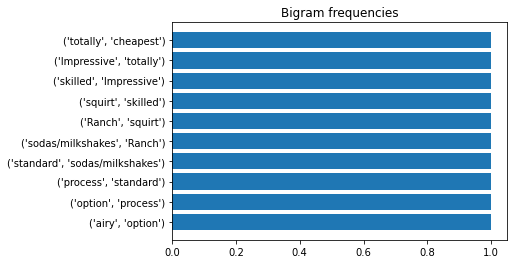

In [34]:
plt.barh(bgs_tr, bgs_f_tr)
plt.title('Bigram frequencies')
plt.show()

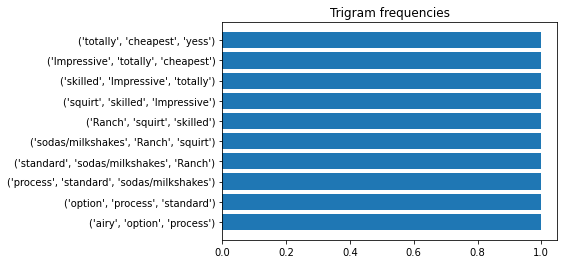

In [35]:
plt.barh(tgs_tr, tgs_f_tr)
plt.title('Trigram frequencies')
plt.show()

####2.1.4. Nube de palabras

In [36]:
#convertir mi lista de palabras en una cadena 
#" ".join(unique_word)

In [37]:
#nube de palabras
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

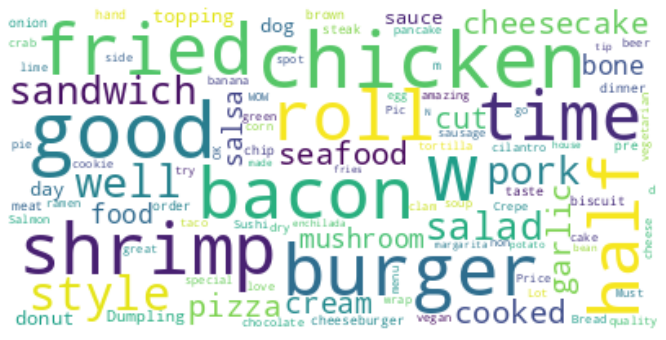

In [38]:
plot_word_cloud(unique_word)

####2.1.5. palabras similares con word2vec

In [39]:
import multiprocessing

from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

#hiperparámetros de inicialización 
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)



2


In [40]:
sent = [row for row in train['words']]
w2v_model.build_vocab(sent, progress_per=10000)

In [41]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.vocab)))

Vocabulario compuesto por 821 palabras


In [42]:
#entrenamos el modelo del w2v
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(749325, 4182450)

In [43]:
#algunos resultados similares de sentimiento postivo
w2v_model.wv.most_similar(positive=["fresh"])

[('super', 0.9994204044342041),
 ('great', 0.9993957877159119),
 ('light', 0.999354362487793),
 ('nice', 0.9993445873260498),
 ('margaritas', 0.9992715120315552),
 ('veggies', 0.9992291331291199),
 ('yummy', 0.9992174506187439),
 ('coleslaw', 0.9992147088050842),
 ('OK', 0.9991923570632935),
 ('Both', 0.9991893768310547)]

In [44]:
#algunos resultados similares de sentimiento postivo
w2v_model.wv.most_similar(positive=["crispy"])

[('crisp', 0.9994844198226929),
 ('waffle', 0.9994335174560547),
 ('moist', 0.9994173049926758),
 ('grilled', 0.9994089603424072),
 ('vegetables', 0.9993884563446045),
 ('cabbage', 0.999387800693512),
 ('tuna', 0.9993847608566284),
 ('breast', 0.9993629455566406),
 ('seasoned', 0.9993578791618347),
 ('salmon', 0.9992801547050476)]

In [45]:
#algunos resultados similares de sentimiento postivo
w2v_model.wv.most_similar(positive=["chicken"])

[('fried', 0.9991375207901001),
 ('rice', 0.997927188873291),
 ('were', 0.9970366954803467),
 ('with', 0.9965192079544067),
 ('ordered', 0.9961873292922974),
 ('The', 0.9961594939231873),
 ('gravy', 0.9959739446640015),
 (',', 0.9957718849182129),
 ('mac', 0.9955854415893555),
 ('potatoes', 0.9953830242156982)]

In [46]:
w2v_model.wv.similarity('fresh', 'crispy')

0.99855465

In [47]:
w2v_model.wv.similarity('chicken', 'fries')

0.9893735

In [48]:
w2v_model.save('./w2v_model.pkl')

In [49]:
# almacenamos las imagenes en nuestro drive
!cp w2v_model.pkl /content/drive/MyDrive/NLP/w2v_model.pkl


In [50]:
!ls -lah 

total 3.0M
drwxr-xr-x 1 root root 4.0K Mar  9 08:30 .
drwxr-xr-x 1 root root 4.0K Mar  9 08:28 ..
drwxr-xr-x 4 root root 4.0K Mar  7 18:12 .config
drwx------ 5 root root 4.0K Mar  9 08:29 drive
drwxr-xr-x 1 root root 4.0K Mar  7 18:14 sample_data
-rw-r--r-- 1 root root 2.9M Mar  9 08:30 w2v_model.pkl


In [51]:
#cargamos el modelo 
w2v_sg = Word2Vec.load('./w2v_model.pkl')

In [52]:
keys = ['crispy','salad','pulled']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [53]:
print(word_clusters)

[['crisp', 'waffle', 'moist', 'grilled', 'vegetables', 'cabbage', 'tuna', 'breast', 'seasoned', 'salmon'], ['also', 'queso', 'roasted', 'soup', 'Salmon', 'red', 'green', 'vegetables', 'garlic', 'catfish'], ['brisket', 'tender', 'belly', 'beans', 'pork', 'sandwich', 'sausage', 'juicy', 'ribs', '&']]


In [54]:
#reducimos la dimensionalidad para representarlo en 2D
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

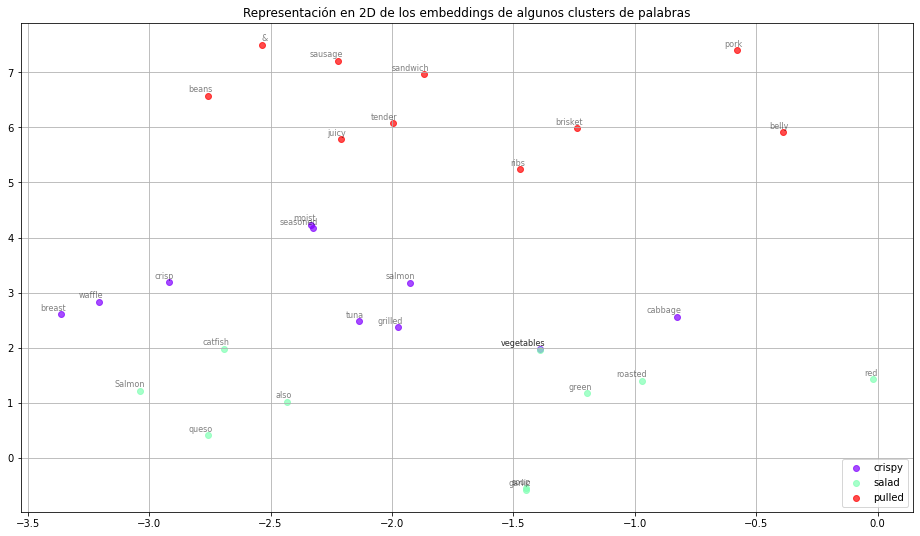

In [55]:
#Representamos los cl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

### 2.2. Ahora el mismo análisis para conjunto test

In [56]:
test

,review_text,reviews_sentiment
221,"Updated review March 11, 2018. Came in tonight...",1
3437,Get the bacon and a Bloody Mary and you are set.,5
3865,I recommend the steamed shrimp and ceviche.,5
5280,Ordering process is a bit wonky and our crab c...,4
5193,Definitely satisfies the ramen cravings. We al...,4
...,...,...
2421,"Great ramen, awful service.",3
4190,Loved the bacon cheese burger wrap! Nachos wer...,5
5056,Great place to enjoy hot crab legs and crawfis...,5
3426,My friend and I started with oyster fries and ...,4


In [57]:
#convertimos en minúsculas y tokenizamos por espacios 
reviews = train['review_text'].str.lower().str.split() 
train.head()

,review_text,reviews_sentiment,words,sentiment_label
4798,The Big Sur Pizza truly deserves its awards.,5,"[The, Big, Sur, Pizza, truly, deserves, its, a...",0
5939,I never knew you could be emotional about pizza.,5,"[I, never, knew, you, could, be, emotional, ab...",0
3317,Amazing clam chowder. Never had so much clam i...,3,"[Amazing, clam, chowder, ., Never, had, so, mu...",1
3711,Came back for their pork brisket steak (good) ...,5,"[Came, back, for, their, pork, brisket, steak,...",0
2047,They have coffee and coffee cinnamon cake avai...,4,"[They, have, coffee, and, coffee, cinnamon, ca...",1


#### 2.1.1. Cardinalidad del vocabulario

In [58]:
#llamamos a nuestra función word_count
test['words'] = test['review_text'].apply(word_count)
test.head()

,review_text,reviews_sentiment,words
221,"Updated review March 11, 2018. Came in tonight...",1,"[Updated, review, March, 11, ,, 2018, ., Came,..."
3437,Get the bacon and a Bloody Mary and you are set.,5,"[Get, the, bacon, and, Bloody, Mary, and, you,..."
3865,I recommend the steamed shrimp and ceviche.,5,"[I, recommend, the, steamed, shrimp, and, cevi..."
5280,Ordering process is a bit wonky and our crab c...,4,"[Ordering, process, is, bit, wonky, and, our, ..."
5193,Definitely satisfies the ramen cravings. We al...,4,"[Definitely, satisfies, the, ramen, cravings, ..."


In [59]:
#creamos una lista con la suma de las palabras de todas las reviews
words_ts = list(test['words'].sum())
words_ts

['Updated',
 'review',
 'March',
 '11',
 ',',
 '2018',
 '.',
 'Came',
 'in',
 'tonight',
 'with',
 'our',
 '13',
 'year',
 'old',
 ',',
 'we',
 'had',
 'the',
 'boneless',
 'wings',
 ',',
 'wiith',
 '4',
 'different',
 'kinds',
 'of',
 'sauce',
 ':',
 'Asian',
 'Zing',
 ',',
 'medium',
 'hot',
 ',',
 'mild',
 'hot',
 ',',
 'and',
 'Thai',
 'curry',
 '.',
 'Wings',
 'were',
 'dry',
 ',',
 'they',
 'do',
 "n't",
 'cook',
 'then',
 'in',
 'the',
 'sauce',
 'they',
 'just',
 'throw',
 'the',
 'sauce',
 'on',
 '.',
 'Get',
 'the',
 'bacon',
 'and',
 'Bloody',
 'Mary',
 'and',
 'you',
 'are',
 'set',
 '.',
 'I',
 'recommend',
 'the',
 'steamed',
 'shrimp',
 'and',
 'ceviche',
 '.',
 'Ordering',
 'process',
 'is',
 'bit',
 'wonky',
 'and',
 'our',
 'crab',
 'cakes',
 'were',
 'under',
 'cooked',
 'and',
 'cool',
 'inside',
 '.',
 'Amazing',
 'cinnamon',
 'rolls',
 '!',
 'Definitely',
 'satisfies',
 'the',
 'ramen',
 'cravings',
 '.',
 'We',
 'also',
 'got',
 'the',
 'fried',
 'chicken',
 'whi

In [60]:
#visualizamos las palabras sin duplicados
unique_word_ts= list(set(test['words'].sum()))
unique_word_ts

['airy',
 'option',
 'process',
 'standard',
 'totally',
 'favour',
 'club',
 'partially',
 'harsh',
 'macaroni',
 'however',
 'COLD',
 'BURGER',
 "'When",
 'vodka',
 'Ottimo',
 'Pancake',
 'still',
 'hammocks',
 'scraped',
 'tail',
 'puran',
 'drinks',
 'jerk',
 'namely',
 'pasted',
 'learn',
 'expectations',
 'stuff',
 'space',
 'Ordering',
 'mash',
 'vermicelli',
 'drier',
 'jam',
 'creative',
 'hours',
 'outfit',
 'remember',
 'separately',
 'Since',
 'peppers',
 'either',
 'Fra',
 'Hooters',
 'awesome',
 'full',
 'sparkling',
 'Soi',
 'through',
 'raise',
 'southern',
 'grits',
 'locals',
 'friggin',
 'ferry',
 'ass',
 'Was',
 'sammies',
 'satisfy',
 'Con',
 "'animal",
 'looking',
 'lost',
 'sub',
 'thickness',
 'happen',
 'burgers/sandwhich',
 'So',
 'Nous',
 'croissant',
 'nicely',
 'suppose',
 'blend',
 'Seattle',
 'where',
 'John',
 'DE-LISH',
 'wife',
 'cuisine',
 'Denver',
 'place',
 'Beans',
 'streaky',
 'mushy',
 'Tendon',
 'Balsamic',
 'south',
 'pineapple',
 'chola',
 's

In [61]:
total_words_ts = len(words_ts)
total_words_ts

47939

In [62]:
total_unique_words_ts = len(unique_word_ts)
total_unique_words_ts

5482

#### 2.1.2. Análisis de sentimiento

In [63]:
#analizo el sentimiento en el punto medio 
test[test['reviews_sentiment']== 3]

,review_text,reviews_sentiment,words
3959,My medium ribeye was well-done.,3,"[My, medium, ribeye, was, well-done, .]"
1512,The chowder bread bowl $10.99. . I got the 1/2...,3,"[The, chowder, bread, bowl, $, 10.99., ., I, g..."
5182,With a lot of chicken sammies under my belt. T...,3,"[With, lot, of, chicken, sammies, under, my, b..."
1065,The food was ok. My friend's smoked prime rib...,3,"[The, food, was, ok., My, friend, 's, smoked, ..."
2546,"We ordered mojito, oyster, fish burger, and cr...",3,"[We, ordered, mojito, ,, oyster, ,, fish, burg..."
...,...,...,...
1628,It is good beef Pho. My wife had the Pho GA (...,3,"[It, is, good, beef, Pho, ., My, wife, had, th..."
1606,"The tater tots were great, being a good crisp ...",3,"[The, tater, tots, were, great, ,, being, good..."
2566,It was everything you could imagine mini fast-...,3,"[It, was, everything, you, could, imagine, min..."
2421,"Great ramen, awful service.",3,"[Great, ramen, ,, awful, service, .]"


In [64]:
#aplico las etiquetas de sentimiento y las meto en una columna
test['sentiment_label'] = test.apply(lambda row: label_sentiment(row), axis=1)

In [65]:
test.head()

,review_text,reviews_sentiment,words,sentiment_label
221,"Updated review March 11, 2018. Came in tonight...",1,"[Updated, review, March, 11, ,, 2018, ., Came,...",1
3437,Get the bacon and a Bloody Mary and you are set.,5,"[Get, the, bacon, and, Bloody, Mary, and, you,...",0
3865,I recommend the steamed shrimp and ceviche.,5,"[I, recommend, the, steamed, shrimp, and, cevi...",0
5280,Ordering process is a bit wonky and our crab c...,4,"[Ordering, process, is, bit, wonky, and, our, ...",1
5193,Definitely satisfies the ramen cravings. We al...,4,"[Definitely, satisfies, the, ramen, cravings, ...",1


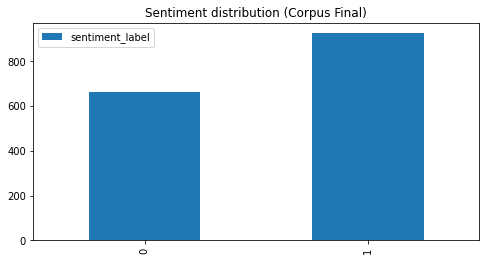

In [66]:
aux_df_ts = pd.DataFrame(test['sentiment_label'].value_counts(sort=False).sort_index())
aux_df_ts = aux_df_ts.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

In [67]:
#contamos las reviews positivas y las negativas
print('Total de etiquetas negativas: ', len(test[test['sentiment_label']== 0]))
print('Total de etiquetas positivas: ',len(test[test['sentiment_label']== 1]))


Total de etiquetas negativas:  664
Total de etiquetas positivas:  925


####2.1.3. N-grams más frecuentes

In [68]:
bigrams_ts = ngrams(unique_word_ts, 2)
trigrams_ts = ngrams(unique_word_ts, 3)

In [69]:
bigrams_freq_ts = FreqDist(bigrams_ts)
trigrams_freq_ts = FreqDist(trigrams_ts)

In [70]:
bigrams_freq_ts.most_common(10)

[(('airy', 'option'), 1),
 (('option', 'process'), 1),
 (('process', 'standard'), 1),
 (('standard', 'totally'), 1),
 (('totally', 'favour'), 1),
 (('favour', 'club'), 1),
 (('club', 'partially'), 1),
 (('partially', 'harsh'), 1),
 (('harsh', 'macaroni'), 1),
 (('macaroni', 'however'), 1)]

In [71]:
trigrams_freq_ts.most_common(10)


[(('airy', 'option', 'process'), 1),
 (('option', 'process', 'standard'), 1),
 (('process', 'standard', 'totally'), 1),
 (('standard', 'totally', 'favour'), 1),
 (('totally', 'favour', 'club'), 1),
 (('favour', 'club', 'partially'), 1),
 (('club', 'partially', 'harsh'), 1),
 (('partially', 'harsh', 'macaroni'), 1),
 (('harsh', 'macaroni', 'however'), 1),
 (('macaroni', 'however', 'COLD'), 1)]

In [72]:
bg_freq_most_common = bigrams_freq_ts.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = trigrams_freq_ts.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [73]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

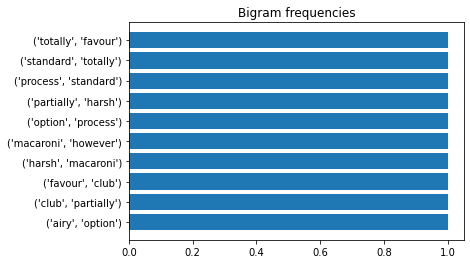

In [74]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

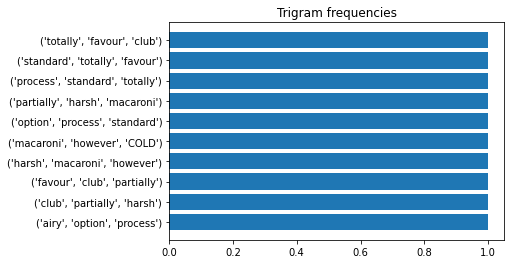

In [75]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

####2.1.4. Nube de palabras

In [76]:
#convertir mi lista de palabras en una cadena 
#" ".join(unique_word)

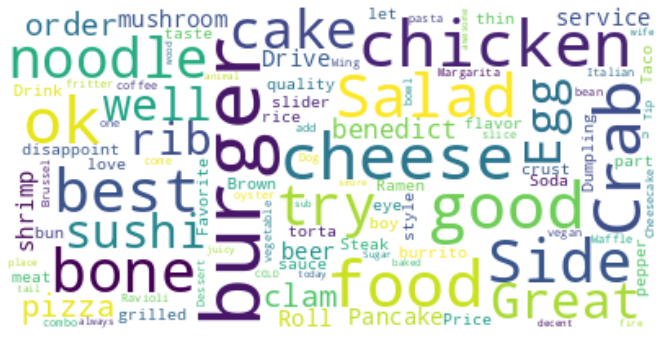

In [77]:
#representamos la nube de palabras
plot_word_cloud(unique_word_ts)

####2.1.5. palabras similares con word2vec

In [78]:
import multiprocessing

from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

#hiperparámetros de inicialización 
w2v_model_ts = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)



2


In [79]:
sent = [row for row in train['words']]
w2v_model_ts.build_vocab(sent, progress_per=10000)

In [80]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model_ts.wv.vocab)))

Vocabulario compuesto por 821 palabras


In [81]:
#entrenamos el modelo del w2v
w2v_model_ts.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(749325, 4182450)

In [82]:
#algunos resultados similares de sentimiento postivo
w2v_model_ts.wv.most_similar(positive=["fresh"])

[('super', 0.9994204044342041),
 ('great', 0.9993957877159119),
 ('light', 0.999354362487793),
 ('nice', 0.9993445873260498),
 ('margaritas', 0.9992715120315552),
 ('veggies', 0.9992291331291199),
 ('yummy', 0.9992174506187439),
 ('coleslaw', 0.9992147088050842),
 ('OK', 0.9991923570632935),
 ('Both', 0.9991893768310547)]

In [83]:
#algunos resultados similares de sentimiento postivo
w2v_model_ts.wv.most_similar(positive=["crispy"])

[('crisp', 0.9994844198226929),
 ('waffle', 0.9994335174560547),
 ('moist', 0.9994173049926758),
 ('grilled', 0.9994089603424072),
 ('vegetables', 0.9993884563446045),
 ('cabbage', 0.999387800693512),
 ('tuna', 0.9993847608566284),
 ('breast', 0.9993629455566406),
 ('seasoned', 0.9993578791618347),
 ('salmon', 0.9992801547050476)]

In [84]:
#algunos resultados similares de sentimiento postivo
w2v_model_ts.wv.most_similar(positive=["chicken"])

[('fried', 0.9991375207901001),
 ('rice', 0.997927188873291),
 ('were', 0.9970366954803467),
 ('with', 0.9965192079544067),
 ('ordered', 0.9961873292922974),
 ('The', 0.9961594939231873),
 ('gravy', 0.9959739446640015),
 (',', 0.9957718849182129),
 ('mac', 0.9955854415893555),
 ('potatoes', 0.9953830242156982)]

In [85]:
w2v_model_ts.wv.similarity('fresh', 'crispy')

0.99855465

In [86]:
w2v_model_ts.wv.similarity('chicken', 'fries')

0.9893735

In [87]:
w2v_model_ts.save('./w2v_model_ts.pkl')

In [88]:
# almacenamos las imagenes en nuestro drive
!cp w2v_model_ts.pkl /content/drive/MyDrive/NLP/w2v_model_ts.pkl


In [89]:
!ls -lah w2v_model_ts.pkl

-rw-r--r-- 1 root root 2.9M Mar  9 08:30 w2v_model_ts.pkl


In [90]:
#cargamos el modelo 
w2v_sg_ts = Word2Vec.load('./w2v_model_ts.pkl')

In [91]:
keys_ts = ['amazing','creamy','fries']

embedding_clusters_ts = []
word_clusters_ts = []
for word in keys_ts:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters_ts.append(embeddings)
    word_clusters_ts.append(words)

In [92]:
print(word_clusters_ts)

[['awesome', 'excellent', 'yummy', 'Had', 'coconut', 'margaritas', 'also', 'outstanding', 'delicious', 'waffle'], ['seasoned', 'overcooked', 'ok', 'moist', 'chewy', 'excellent', 'crisp', 'spicy', 'also', 'delicious'], ['slaw', 'bacon', 'okra', 'seasoned', 'hash', 'Brisket', 'sides', 'Ribs', 'delicious', 'sweet']]


In [93]:
#reducimos la dimensionalidad para representarlo en 2D
tsne_model_2d_ts = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

embed_clusters_ts = np.array(embedding_clusters_ts)
n, m, k = embed_clusters_ts.shape

embeddings_2d_ts = np.array(tsne_model_2d.fit_transform(embed_clusters_ts.reshape(n * m, k))).reshape(n, m, 2)

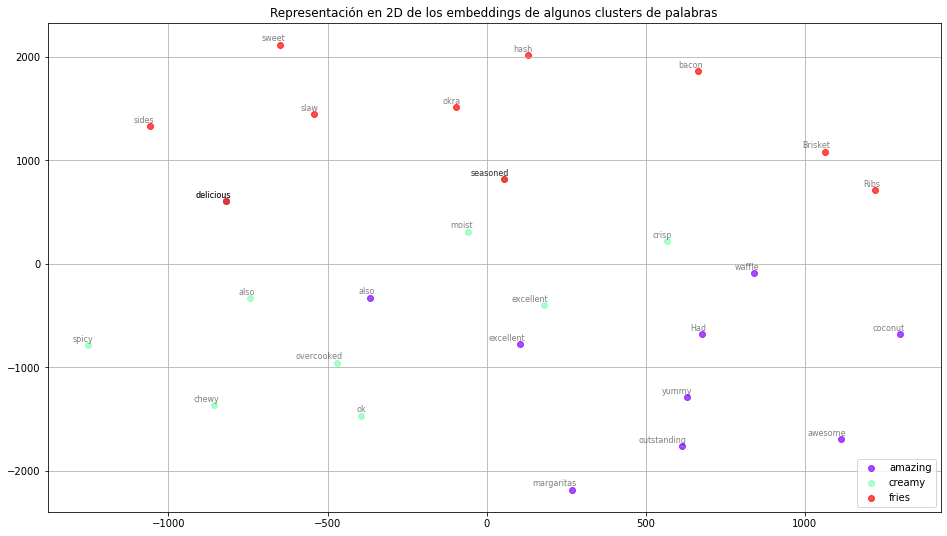

In [94]:
#Representamos los clusters

tsne_plot_similar_words(keys_ts, embeddings_2d_ts, word_clusters_ts)

## 3. Conclusiones del análisis exploratorio


Nos encontramos con un conjunto de palabras bastante sucío con numerosas stopwords, simbolos y signos de puntuación.


#### Guardamos todo en gDrive

In [95]:
#train.to_csv('./train.csv', sep=';', decimal='.', index=False)
#test.to_csv('./test.csv', sep=';', decimal='.', index=False)

In [96]:
# guardamos los dfs

train.to_csv('train.csv', encoding='utf-8', index=False)
test.to_csv('test.csv', encoding='utf-8', index=False)


In [97]:
#compruebo que los he guardado en mi disco de colab
!ls -lah   

total 8.2M
drwxr-xr-x 1 root root 4.0K Mar  9 08:30 .
drwxr-xr-x 1 root root 4.0K Mar  9 08:28 ..
drwxr-xr-x 4 root root 4.0K Mar  7 18:12 .config
drwx------ 5 root root 4.0K Mar  9 08:29 drive
drwxr-xr-x 1 root root 4.0K Mar  7 18:14 sample_data
-rw-r--r-- 1 root root 620K Mar  9 08:30 test.csv
-rw-r--r-- 1 root root 1.8M Mar  9 08:30 train.csv
-rw-r--r-- 1 root root 2.9M Mar  9 08:30 w2v_model.pkl
-rw-r--r-- 1 root root 2.9M Mar  9 08:30 w2v_model_ts.pkl


In [98]:
# lo movemos a nuestro en nuestro google drive
!cp /content/train.csv /content/drive/MyDrive/NLP/train.csv
!cp /content/test.csv /content/drive/MyDrive/NLP/test.csv